In [1]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
pima = pd.read_csv("./data/diabetes.csv",header=0)

pima.rename({'Pregnancies':'p1'},axis=1)



,p1,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
# load dataset
pima = pd.read_csv("./data/diabetes.csv",header=0)
pima.rename({i :j for i, j in zip(pima.columns,col_names)}, axis=1, inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima[pima['pregnant']==0]['pregnant'].count()

111

In [5]:
# 데이터가 0인 index 들 의 각각의 0을 가진 데이터 수 출력하기
for index in pima.columns:
    data=pima[pima[index]==0][index].count()
    print(index, data)

pregnant 111
glucose 5
bp 35
skin 227
insulin 374
bmi 11
pedigree 0
age 0
outcome 500


In [6]:
# outcome 을 제외한 모든 데이터들의 0 값을 nan 값으로 replace해줌
import numpy as np
pima.iloc[:,:-1]=pima.replace(0,np.nan )

In [7]:
# nan 값으로 변경후 0 값이 있는지 재확인
for index in pima.columns:
    data=pima[pima[index]==0][index].count()
    print(index, data)

pregnant 0
glucose 0
bp 0
skin 0
insulin 0
bmi 0
pedigree 0
age 0
outcome 500


In [6]:
# outcome 값이 1인 것과 0인 것의 데이터를 나누어줌
positive=pima[pima['outcome']==1].copy()
negative=pima[pima['outcome']==0].copy()

In [7]:
# outcome으로 나누어준 데이터들의 각각의 info 를 확인
print(positive.info())
print(negative.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  230 non-null    float64
 1   glucose   266 non-null    float64
 2   bp        252 non-null    float64
 3   skin      180 non-null    float64
 4   insulin   130 non-null    float64
 5   bmi       266 non-null    float64
 6   pedigree  268 non-null    float64
 7   age       268 non-null    int64  
 8   outcome   268 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 20.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  427 non-null    float64
 1   glucose   497 non-null    float64
 2   bp        481 non-null    float64
 3   skin      361 non-null    float64
 4   insulin   264 non-null    float64
 5   bmi       491 non-null    flo

In [8]:
# 각각의 null값의 갯수를 출력 해봄
print(positive.isnull().sum())
print(negative.isnull().sum())

pregnant     38
glucose       2
bp           16
skin         88
insulin     138
bmi           2
pedigree      0
age           0
outcome       0
dtype: int64
pregnant     73
glucose       3
bp           19
skin        139
insulin     236
bmi           9
pedigree      0
age           0
outcome       0
dtype: int64


In [9]:
# 1 인 데이터들의 nan 값들에 fillna로 평균 값을 채워줌.
# inplace로 새로운 메모리를 할당하지 않고 저장
for index in positive.columns:
    positive[index].fillna(positive[index].mean(),inplace=True)

In [10]:
# 0 인 데이터들의 nan 값들에 평균 값을 채워줌.
for index in negative.columns:
    negative[index].fillna(negative[index].mean(),inplace=True)

In [11]:
# 1인 데이터들과 1인 데이터들을 concat 으로 합쳐줌 
pima=pd.concat([positive, negative],ignore_index=True)
# ignore_index  : 인덱스를 재정렬시켜줌

In [12]:
print(pima.head())

   pregnant  glucose    bp  skin     insulin   bmi  pedigree  age  outcome
0  6.000000    148.0  72.0  35.0  206.846154  33.6     0.627   50        1
1  8.000000    183.0  64.0  33.0  206.846154  23.3     0.672   32        1
2  5.669565    137.0  40.0  35.0  168.000000  43.1     2.288   33        1
3  3.000000     78.0  50.0  32.0   88.000000  31.0     0.248   26        1
4  2.000000    197.0  70.0  45.0  543.000000  30.5     0.158   53        1


In [13]:
# 스탠다드 스케일링
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()

x=pima.iloc[:, :-1] # outcome 제외 데이터들
y=pima.iloc[:, -1] # outcome 데이터
scaler.fit(x)

x_scale=scaler.transform(x)
print(x_scale[:3])

[[ 0.50391247  0.86401998 -0.03538894  0.64508805  0.56127161  0.16780591
   0.46849198  1.4259954 ]
 [ 1.17252053  2.01374094 -0.69664653  0.42082495  0.56127161 -1.33048716
   0.60439732 -0.10558415]
 [ 0.39344679  0.5026791  -2.68041933  0.64508805  0.12382991  1.54972669
   5.4849091  -0.0204964 ]]


In [14]:
print(type(y))
print(type(x_scale))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [15]:
std_pima=pd.DataFrame(data=x_scale, columns=col_names[:-1])

std_pima['outcome']=y
std_pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,outcome
0,0.503912,0.864020,-0.035389,0.645088,0.561272,0.167806,0.468492,1.425995,1
1,1.172521,2.013741,-0.696647,0.420825,0.561272,-1.330487,0.604397,-0.105584,1
2,0.393447,0.502679,-2.680419,0.645088,0.123830,1.549727,5.484909,-0.020496,1
3,-0.499000,-1.435422,-1.853847,0.308693,-0.777040,-0.210404,-0.676133,-0.616111,1
4,-0.833304,2.473629,-0.200703,1.766404,4.346658,-0.283137,-0.947944,1.681259,1
...,...,...,...,...,...,...,...,...,...
763,1.506825,-1.074081,-0.861961,-0.225562,-0.300842,-1.446859,-0.996266,-0.020496,0
764,1.841129,-0.679891,0.295240,2.102798,0.258960,0.065980,-0.908682,2.532136,0
765,-0.833304,0.009942,-0.200703,-0.251964,-0.300842,0.633295,-0.398282,-0.531023,0
766,0.169608,-0.022908,-0.035389,-0.700491,-0.506779,-0.908638,-0.685193,-0.275760,0


In [16]:
y=std_pima.iloc[:, -1]
x=std_pima.iloc[:, :-1]

In [17]:
print((y==1).sum())
print((y==0).sum())

268
500


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_score, roc_auc_score,f1_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
pred=logreg.predict(X_test)

pred_proba=logreg.predict_proba(X_test)[:,1]

pred_proba.shape

(154,)

In [20]:
confusion=confusion_matrix(y_test, pred)

accuracy=accuracy_score(y_test, pred)
precision=precision_score(y_test, pred)
recall =recall_score(y_test, pred)

f1=f1_score(y_test, pred)

roc_auc=roc_auc_score(y_test, pred_proba)
print('precision :{0}, recall:{1}, accuracy:{2} f1:{3}'.format(precision, recall, accuracy,f1 ))

precision :0.8116883116883117, recall:0.6964285714285714, accuracy:0.8116883116883117 f1:0.7289719626168223


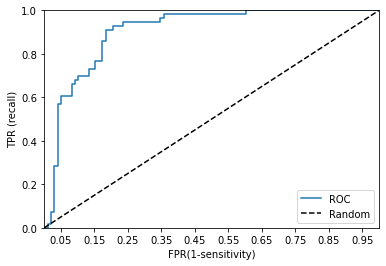

In [21]:
import matplotlib.pyplot as plt
pred_proba_c1=logreg.predict_proba(X_test)[:,1]
fprs, tprs, threashoders=roc_curve(y_test, pred_proba_c1)

plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], 'k--', label='Random')

start, end=plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1),2))


plt.xlim(0,1)
plt.ylim(0,1)

plt.xlabel('FPR(1-sensitivity)');
plt.ylabel('TPR (recall)')
plt.legend()



In [22]:
confusion=confusion_matrix(y_test, pred)

accuracy=accuracy_score(y_test, pred)
precision=accuracy_score(y_test, pred)
recall =recall_score(y_test, pred)

f1=f1_score(y_test, pred)

roc_auc=roc_auc_score(y_test, pred_proba)
print('precision :{0}, recall:{1}, accuracy:{2} f1:{3}'.format(precision, recall, accuracy,f1 ))

precision :0.8116883116883117, recall:0.6964285714285714, accuracy:0.8116883116883117 f1:0.7289719626168223


In [23]:
from sklearn.preprocessing import Binarizer

for data in np.arange(0.20, 0.40, 0.01):
    binarizer=Binarizer(threshold=data)
    pred_proba.shape
    pred2= binarizer.fit_transform(pred_proba.reshape(-1,1))
    confusion=confusion_matrix(y_test, pred2)

    accuracy=accuracy_score(y_test, pred2)
    precision=accuracy_score(y_test, pred2)
    recall =recall_score(y_test, pred2)

    f1=f1_score(y_test, pred2)

    roc_auc=roc_auc_score(y_test, pred_proba)
    print('data: {4} ,precision :{0}, recall:{1}, accuracy:{2} f1:{3}'.format(precision, recall, accuracy,f1, data ))
    

data: 0.2 ,precision :0.7272727272727273, recall:0.9821428571428571, accuracy:0.7272727272727273 f1:0.7236842105263158
data: 0.21000000000000002 ,precision :0.7467532467532467, recall:0.9821428571428571, accuracy:0.7467532467532467 f1:0.7382550335570469
data: 0.22000000000000003 ,precision :0.7467532467532467, recall:0.9821428571428571, accuracy:0.7467532467532467 f1:0.7382550335570469
data: 0.23000000000000004 ,precision :0.7532467532467533, recall:0.9821428571428571, accuracy:0.7532467532467533 f1:0.7432432432432433
data: 0.24000000000000005 ,precision :0.7662337662337663, recall:0.9821428571428571, accuracy:0.7662337662337663 f1:0.7534246575342465
data: 0.25000000000000006 ,precision :0.7662337662337663, recall:0.9821428571428571, accuracy:0.7662337662337663 f1:0.7534246575342465
data: 0.26000000000000006 ,precision :0.7662337662337663, recall:0.9642857142857143, accuracy:0.7662337662337663 f1:0.75
data: 0.2700000000000001 ,precision :0.7662337662337663, recall:0.9464285714285714, a

### data: 0.34000000000000014 
precision :0.8441558441558441, recall:0.9285714285714286, accuracy:0.8441558441558441 f1:0.8125000000000001